<div style="border:solid green 2px; padding: 20px">
<b>Оксана, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Рынок заведений общественного питания Москвы

Ислледование рынка общественного питания для проекта по открытию небольшого кафе в Москве, где гостей должны обслуживать роботы. Инвесторов интересует текущее положение дел на рынке — сможете ли кафе снискать популярность на долгое время. У нас есть открытые данные о заведениях общественного питания в Москве.

**План работы:**

- обзор и предобработка данных
- анализ заведений по типам заведения
- анализ расперделения заведений по числу посадочных мест
- исследование места расположения нового заведения

## Предобработка данных

In [34]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
sns.set_palette('dark')

In [36]:
df = pd.read_csv('/datasets/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Описание данных

- **id** — идентификатор объекта;
- **object_name** — название объекта общественного питания;
- **chain** — сетевой ресторан;
- **object_type** — тип объекта общественного питания;
- **address** — адрес;
- **number** — количество посадочных мест.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [38]:
print ('Дубликатов в таблице:', df.duplicated().sum())

Дубликатов в таблице: 0


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

А если посмотреть на удаление одного столбца, например `id` и ещё раз проверить дубликаты, какую картину можно будет увидеть ?
    
Оставил пример ниже с подобного типа данных.

`rest[rest['object_name']== 'комбинат питания мгту им.н.э.баумана']`
    
Да, такое может быть что на одном адресе несколько разных типов заведений питаний.
    
Комментарий подсветил красным, чтобы мы знали, что такая ситуцаия в целом возможна в наших данных. В целом мы получим около 80 дубликатов, которые не повлияют на общие выводы.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Noted</div>

##  Cоотношение видов объектов общественного питания по количеству

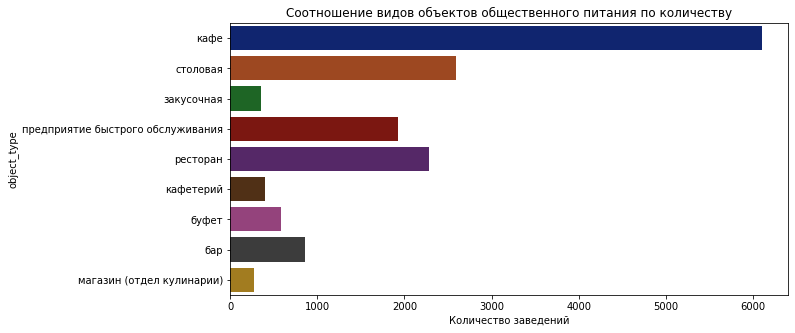

In [39]:
plt.subplots(figsize=(10, 5))
sns.countplot(y="object_type", data=df)

plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('Количество заведений')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

## Cоотношение сетевых и несетевых заведений по количеству

In [40]:
chain = df.groupby('chain').agg('count').reset_index()

In [41]:
fig = go.Figure(data=[go.Pie(labels=chain['chain'], values=chain['id'], sort=False)])

fig.layout.title= 'Соотношение сетевых и несетевых заведений по количеству'
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

На первый взгляд так и не скажешь, что несетевых объектов больше. 
    
Хорошо, что подтвердили это с помощью наших данных.
    
</div>

## Cетевое распространение по заведениям

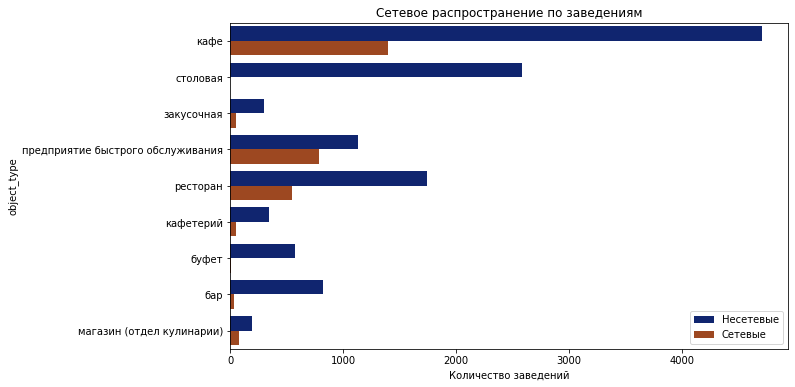

In [42]:
plt.subplots(figsize=(10, 6))
sns.countplot(y='object_type', hue="chain", data=df)
plt.title('Сетевое распространение по заведениям')
plt.xlabel('Количество заведений')
plt.legend(['Несетевые' ,'Сетевые'])
plt.show()

80,7% объектов не являются сетевыми. Самое большое количество заведений в группах кафе, столовая, ресторан и предприятие быстрого обслуживания. Для всех, кроме столовых, характерно сетевое распространение. Остальные группы включают гораздо меньше заведений и редко являются частью сети.

Рассмотрим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест. Для этого сгруппируем данные по заведениям и посчитаем количество объектов и среднее количество посадочных мест.

## Распределение сетевых заведений по числу посадочных мест

In [43]:
temp = df.query('chain == "да"')
temp = temp.groupby('object_name').agg({'id': 'count', 'number': 'mean'})
temp.head()

,id,number
object_name,,
Beverly Hills Diner,1,88.000000
Bierloga,1,75.000000
Black & White,1,40.000000
Bocconcino,3,66.666667
BooBo,1,46.000000


Напишем функции, которые возвращают группу в зависимости от количества заведений и числа посадочных мест. Будем считать, мало посадочных мест в заведениях, где их не больше 30 и малое заведений в сети, где их не больше 5

In [44]:
def object_size(value):
    if value <=30: 
        return "Мало мест"
    return "Много мест"

In [45]:
def object_count(value):
    if value <=5: 
        return "Мало заведений"
    return "Много заведений"

In [46]:
temp['size'] = temp['number'].apply(object_size)
temp['count'] = temp['id'].apply(object_count)
temp.head()

,id,number,size,count
object_name,,,,
Beverly Hills Diner,1,88.000000,Много мест,Мало заведений
Bierloga,1,75.000000,Много мест,Мало заведений
Black & White,1,40.000000,Много мест,Мало заведений
Bocconcino,3,66.666667,Много мест,Мало заведений
BooBo,1,46.000000,Много мест,Мало заведений


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Интересные категории для данных 👍    
</div>

In [47]:
temp['Группа'] = temp['size'].astype(str) + '-' + temp['count'].astype(str)
temp.head()

,id,number,size,count,Группа
object_name,,,,,
Beverly Hills Diner,1,88.000000,Много мест,Мало заведений,Много мест-Мало заведений
Bierloga,1,75.000000,Много мест,Мало заведений,Много мест-Мало заведений
Black & White,1,40.000000,Много мест,Мало заведений,Много мест-Мало заведений
Bocconcino,3,66.666667,Много мест,Мало заведений,Много мест-Мало заведений
BooBo,1,46.000000,Много мест,Мало заведений,Много мест-Мало заведений


In [48]:
temp.groupby('Группа').agg({'id': 'count'})

,id
Группа,
Мало мест-Мало заведений,237
Мало мест-Много заведений,31
Много мест-Мало заведений,401
Много мест-Много заведений,55


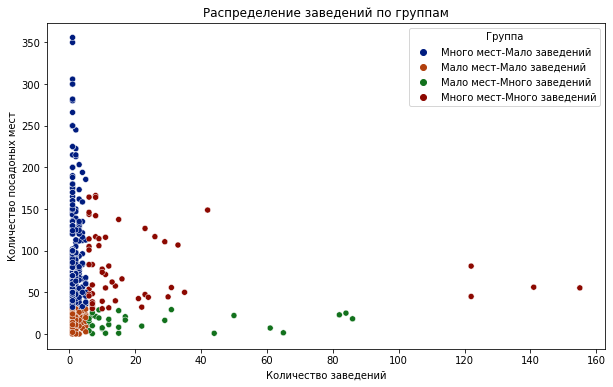

In [49]:
f, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='id', y='number', hue='Группа', data=temp)

plt.title('Распределение заведений по группам')
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадоных мест')
plt.show()

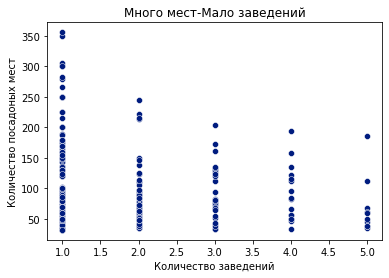

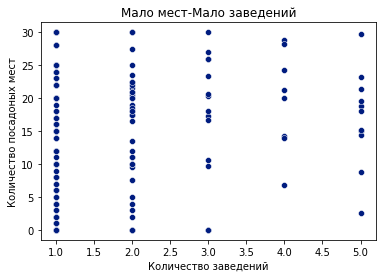

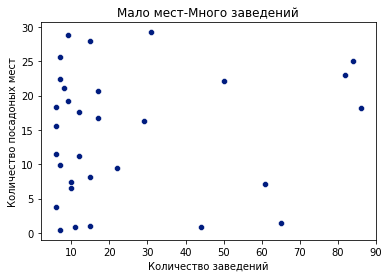

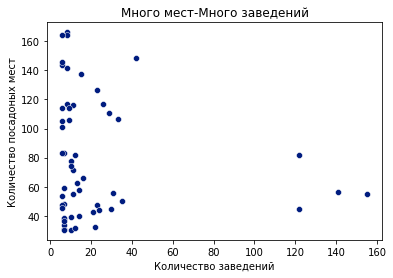

In [50]:
for i in temp['Группа'].unique():
    data=temp[temp['Группа'] == i]
    sns.scatterplot(x='id', y='number', data=data)

    plt.title(i)
    plt.xlabel('Количество заведений')
    plt.ylabel('Количество посадоных мест')
    plt.show()

Наиболее распространенными являются небольшие сети до 5 объектов c разной вместимостью

## Среднее количество посадочных мест

In [51]:
#функция визуализации
def bar(data, x, y, title):
    fig = px.bar(
        data, y=y, x=x, title=title
    )
    fig.update_xaxes(tickangle=45)
    fig.show() 

In [52]:
#среднее количесвто посадочных мест по типу заведения
type_agg_mean = df.groupby('object_type').agg({'number':'mean'}).reset_index().sort_values(by='number', ascending=False)

In [53]:
bar(type_agg_mean, 'object_type', 'number', 'Среднее количество посадочных мест')

Рестораны и столовые, в основном, рассчитаны на большое количество посетителей. Буфеты бары и кафе вмещают в среднем около 40 человек, а остальные - не более 20. Сравним среднее значение с медианой

In [54]:
type_agg_median = df.groupby('object_type').agg({'number':'median'}).reset_index().sort_values(by='number', ascending=False)

In [55]:
bar(type_agg_median, 'object_type', 'number', 'Медиана количества посадочных мест')

График показывает, что средние значения гораздо больше медиан. Так, 50% столовых вмещает до 100 человек, ресторанов - до 80, а баров, буфетов и кафе 30-35 человек

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Думаю мы и так знали, что столовая будет на первом месте по кол-ву посадочных мест, но самое главное – что мы подтвердили это с помощью данных, используя так называемый `data driven` подход 😊
    
Что может быть лучше? 😊
    
---
    
Как аналог можно было бы сравнить средние показатели и медиану, т.к. за частую средние значения могут быть гораздо больше медиан.
    
</div>

## Топ-10 улиц по количеству объектов общественного питания

Выделим в отдельный столбец информацию об улице из столбца address .

In [56]:
def street(val):
    val = val.split(', ')
    for i in val:
        for j in [
            'проезд', 'проспект', 'переулок', 'улица', 'бульвар', 'шоссе', 'площадь', 'аллея', 'набережная', 'Зеленоград', 'Акулово',
            'линия', 'квартал', 'микрорайон', 'поселение', 'тупик', 'километр', 'территория', 'просек'
        ]:
            
            if j in i: return i

In [57]:
df['street'] = df['address'].apply(street)

In [58]:
df['street'].isna().sum()

0

Рассмотрим на каких улицах размещено большее количество заведений и к каким районам они относятся

In [59]:
street_grouped = df.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
top_street = street_grouped.loc[:9]
top_street

,street,id
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,183
3,Ленинградский проспект,173
4,Пресненская набережная,167
5,Варшавское шоссе,164
6,Ленинский проспект,148
7,поселение Сосенское,139
8,проспект Вернадского,132
9,Кутузовский проспект,114


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что некоторые графики у нас повторяются.
    
Это говорит о том, что мы можем создать функцию для постоянного их построения. И с помощью этого повысить оптимизацию своего кода и презентабельность проекта в целом.
    
То есть мы можем создать "обёртки" с методами, и в функцию будем подавать нужные перменные: 
    
- датасет
- подписи графика и осей
- и прочие любые настройки
    
</div>

<div class="alert alert-info"><b>Комментарий студента:</b> Вуаля)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Супер 👍    
</div>

In [60]:
bar(top_street, 'street', 'id', 'Количество заведений по улицам')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Вопрос со **"звездочкой"** 😊:

Как ты считаешь это тот самый топ который нам нужен ? 
    
То есть возможно это улицы такие большие и поэтому в них большое количестов объектов питания ? 
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Ну очевидно, что самые большие улицы. Я реально не поняла зачем в задании этот топ</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Да, так и есть. Здесь больше хотел, чтобы ты написала какие-то свои мысли.
    
</div>

In [61]:
from io import BytesIO
import requests

spreadsheet_id = '17frKTPpvsw-eu_W1D4kJ3idt4k1eMf3DBYxpslxVINs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)


r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что разобрались как подключать сторонний источник 😊👏👏
    
</div>

In [62]:
moscow_streets = moscow_streets.rename(columns={'streetname': 'street'})
moscow_streets['street'] = moscow_streets['street'].str.strip()

In [63]:
top_street.merge(moscow_streets, on='street', how='left').groupby(['street', 'area']).agg({'id': 'first'}).sort_values(by='id', ascending=False)

id
street                 area                            
город Зеленоград       Панфиловский район           232
                       Район Матушкино-Савелки      232
                       Район Крюково                232
проспект Мира          Ярославский Район            204
                       Район Свиблово               204
                       Район Ростокино              204
                       Район Марьина роща           204
                       Останкинский район           204
                       Мещанский район              204
                       Алексеевский район           204
Профсоюзная улица      Район Коньково               183
                       Район Теплый Стан            183
                       Район Черемушки              183
                       Район Ясенево                183
                       Обручевский район            183
                       Академический район          183
Ленинградский проспект Хорошевский район            173
                       Район Сокол                  173
                       Район Беговой                173
                       Район Аэропорт               173
Пресненская набережная Пресненский район            167
Варшавское шоссе       Донской район                164
                       Нагорный район               164
                       Район Нагатино-Садовники     164
                       Район Северное Бутово        164
                       Район Чертаново Северное     164
                       Район Чертаново Центральное  164
                       Район Чертаново Южное        164
                       Район Южное Бутово           164
Ленинский проспект     Район Якиманка               148
                       Донской район                148
                       Ломоносовский район          148
                       Обручевский район            148
                       Район Гагаринский            148
                       Район Проспект Вернадского   148
                       Район Теплый Стан            148
                       Район Тропарево-Никулино     148
проспект Вернадского   Район Гагаринский            132
                       Район Проспект Вернадского   132
                       Район Раменки                132
                       Район Тропарево-Никулино     132
                       Ломоносовский район          132
Кутузовский проспект   Район Фили-Давыдково         114
                       Район Дорогомилово           114

Наибольшее количество заведений в Зеленограде и на улицах, пересекающих несколько районов Москвы. Найдем число улиц с одним объектом общественного питания и рассмотрим в каких районах они находятся

In [64]:
one_object = street_grouped.query('id == 1').merge(moscow_streets, on='street', how='left').groupby(['area']).agg({'street': 'count'}).sort_values(by='street', ascending=False).reset_index().head(10)
one_object

,area,street
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Пресненский район,20
4,Тверской район,20
5,Район Арбат,18
6,Район Марьина роща,18
7,Мещанский район,15
8,Район Сокольники,15
9,Район Замоскворечье,14


In [65]:
bar(one_object, 'area', 'street', 'Количество улиц с одним заведением')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Отличный инсайт 
    
---

Хорошим тоном считается показывать значения на графиках. 
    
Кстати это можно сделать с помощью:
    
- в бибилотеке `plotly` с помощью атрибута `text`, например в методе `px.bar`
- в библиотеке `matplotlib` <a href="https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples">первый пример</a>, <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html">второй пример</a> для группированных графиков
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Пыталась добавить `text_auto=True`, но ничего из этого не вышло)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Все как обычно есть в официальной документации библиотеки.
    
https://plotly.com/python/text-and-annotations/
    
</div>

## Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания


In [66]:
top = top_street['street']
frame = df.query('street in @top')

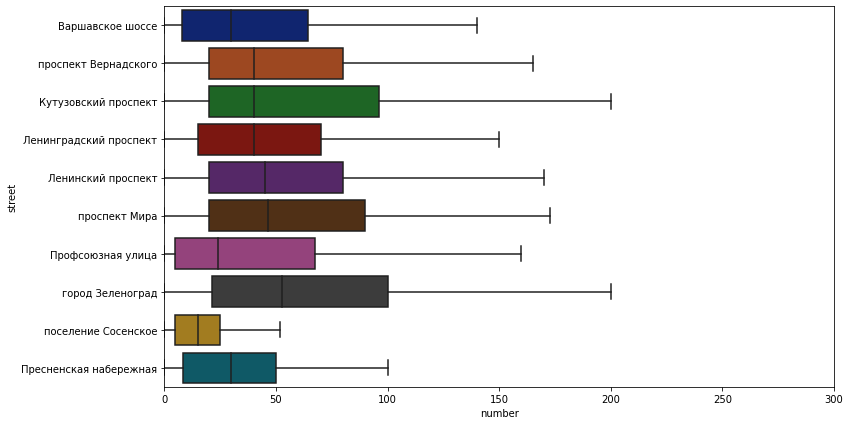

In [67]:
plt.subplots(figsize=(12, 7))

plt.xlim(0, 300)
sns.boxplot(y='street', x='number', showfliers=False, data=frame) 
plt.show()


Распределение показывает, что для улиц с больши количеством объектов общественного питания характерны небольшие заведения, вместимостью около 50 посетителей.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Супер, визуализация для определения разброса данных по каждой улице 👍
    
Кстати можно использовать параметр `showfliers=False`, чтобы сразу отсечь выбросы на графике.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> А здесь получилось) Еще читала, что для презентаций инвесторам ящик с усами не очень подходит, т.к. для неподготовленных сложноватый график) но в презентацию добавила, потому что он красивый))</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Да так и есть, топ менеджменту показывать такие графики – это плохая идея 😁    
</div>

##  Вывод

На основе проведенного исследования можно сделать вывод, что целесобразно открыть небольшое кафе или бистро, вместимостью до 50 человек. Стоит рассматривать те районы, где улицы не перенасыщены объектами общественного питания. Когда заведение становится сетевым - это закономерный путь развития, потому что каждое последующее заведение усиливает брэнд в целом и создает в сознании людей некий привычный образ. Потребители привыкли доверять проверенным брэндам, особенно это касается питания. Если одно заведение найдет отклик у посетителей, можно рассматривать открытие небольшой сети.

Презентация: <https://cloud.mail.ru/public/GnDW/wJ546ngfn>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом работа очень хорошая. Использовано достаточно большое количество информации, которое складывается в одну общую картинку.
    
На самом деле, там где мы используем повторяющиеся действия по построениям графиков, то есть однотипные графики, рекомендую создавать функции, чтобы не писать один и тот же код несколько раз. Тем самым сможем автоматизировать и оптимизировать свой проект.
    
---
    
    
Презентация сделана хорошо, особенно порадовало:
    
- её структурность
- выводы для всех графиков
- последовательность
- стиль
- файл в формате .pdf
    
Как её можно было бы ещё улучшить:
    
    
- сформировать summary в самом начале презентации, все любят видеть результат сразу 😊
- добавить цель самого исследования на втором слайде
- пронумеровать слайды
- сделать оглавление

    
В остальном всё чудно😊
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Это была первая презентация в моей жизни))) как-то удавалось этого избежать раньше) может быть я ее даже переделаю, когда будет время, а сейчас мне надо сдать сборный проект до субботы))</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Женя, спасибо большое за отзыв и полезные советы! </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Рад, что в целом все понятно. Тогда предлагаю двигаться дальше 😊
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
        
</div>